In [1]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier

c:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"F:\PCA_70_features\PCA_70_features new.csv")
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,result
18154,-4.337347,-0.639926,-0.337192,1.271553,-1.084189,1.097902,1.153630,0.863484,1.430379,0.301685,...,0.061207,0.319703,0.772064,0.193562,-0.243262,0.332852,-0.167486,0.076279,0.767454,0
12461,-6.815728,-0.325530,0.868099,0.855123,-0.991764,-0.620609,0.632296,-0.022315,-0.507471,0.220597,...,-0.093938,-0.125650,0.448027,0.272614,0.343574,0.195147,0.060988,0.126104,-0.011784,0
46984,5.705666,-0.724282,0.480053,4.591865,-0.792378,-4.262064,-1.307953,3.749664,-3.611937,-4.904483,...,0.073404,0.012354,-0.111884,0.067944,0.418783,-0.279008,0.135715,0.259861,0.065768,0
36714,-5.624991,-1.081387,-0.226158,-1.019414,-0.502233,-2.597638,0.138189,-0.868171,-0.836814,1.023040,...,-0.175583,-0.061324,0.642306,0.257071,0.048142,-0.210581,0.170259,0.241726,-0.117990,0
34886,21.060828,-6.158036,-2.326350,3.930852,-1.820384,-1.130316,-1.177972,-1.838232,0.598371,8.204025,...,0.419258,-0.309714,0.103803,-0.292704,0.291389,0.247619,0.384275,-0.055432,0.425849,0


In [4]:
df.result.value_counts()

0    42209
1     5667
Name: result, dtype: int64

In [5]:
pip install tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\siddh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

from tensorflow_addons import losses

In [7]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
X.shape,y.shape

((47876, 70), (47876,))

In [9]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (33513, 70)
Number transactions y_train dataset:  (33513,)
Number transactions X_test dataset:  (14363, 70)
Number transactions y_test dataset:  (14363,)


In [10]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3975
Before OverSampling, counts of label '0': 29538 

After OverSampling, the shape of train_X: (59076, 70)
After OverSampling, the shape of train_y: (59076,) 

After OverSampling, counts of label '1': 29538
After OverSampling, counts of label '0': 29538


In [11]:
X_test.shape,y_test.shape

((14363, 70), (14363,))

In [12]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

XGBOOST MODEL

In [13]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_res, y_train_res)

print_score(xgb_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(xgb_clf, X_train_res, y_train_res, X_test, y_test, train=False)

[21:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 98.14%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.991226      0.971986  0.981414      0.981606      0.981606
recall         0.971427      0.991401  0.981414      0.981414      0.981414
f1-score       0.981226      0.981598  0.981414      0.981412      0.981412
support    29538.000000  29538.000000  0.981414  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[28694   844]
 [  254 29284]]

Test Result:
Accuracy Score: 89.06%
_______________________________________________
CLASSIFICATION REP

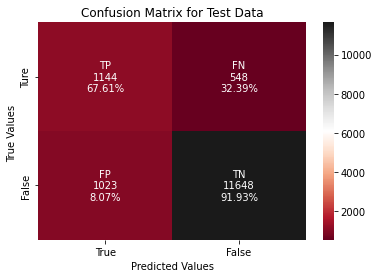

In [14]:
y_pred = xgb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9012428185728921

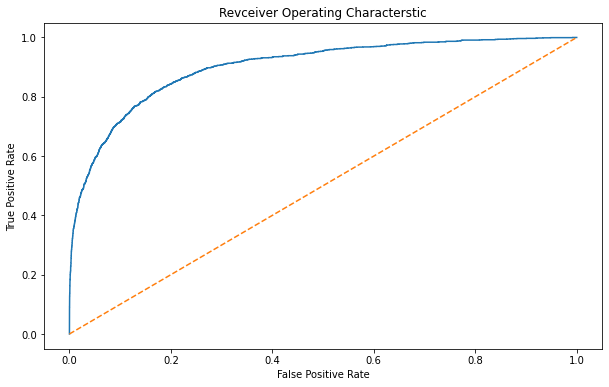

In [16]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

LGBM MODEL

In [17]:
from lightgbm import LGBMClassifier
lgbmc_clf = LGBMClassifier(int = 10,) 
lgbmc_clf.fit(X_train_res, y_train_res)

print_score(lgbmc_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(lgbmc_clf, X_train_res, y_train_res, X_test, y_test, train=False)

[LightGBM] [Warning] Unknown parameter: int
Train Result:
Accuracy Score: 92.09%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.928845      0.913307  0.920932      0.921076      0.921076
recall         0.911707      0.930158  0.920932      0.920932      0.920932
f1-score       0.920196      0.921655  0.920932      0.920926      0.920926
support    29538.000000  29538.000000  0.920932  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[26930  2608]
 [ 2063 27475]]

Test Result:
Accuracy Score: 86.56%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.960707     0.455855  0.865557      0.708281      0.901234
recall         0.883750     0.729314  0.865557      0.806532      0.865557
f1-score       0.920623     0.561037

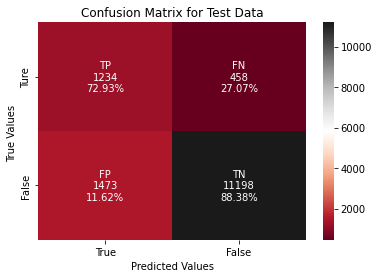

In [18]:
y_pred = lgbmc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8971077550363976

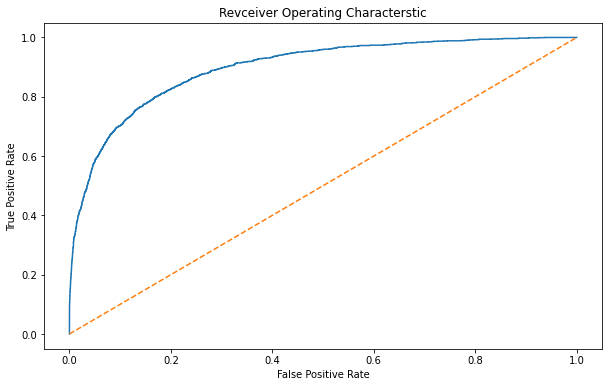

In [20]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

SUPPORT VECTOR METHOD

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train_res, y_train_res)

print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.38%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.957055      0.912822  0.933814      0.934939      0.934939
recall         0.908389      0.959239  0.933814      0.933814      0.933814
f1-score       0.932087      0.935455  0.933814      0.933771      0.933771
support    29538.000000  29538.000000  0.933814  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[26832  2706]
 [ 1204 28334]]

Test Result:
Accuracy Score: 86.84%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.964098     0.463974  0.868412      0.714036      0.905182
recall         0.883750     0.753546  0.868412      0.818648      0.868412
f1-score       0.922177     0.574324  0.868412      0.748251      0.881199
suppo

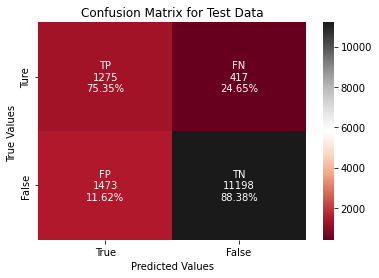

In [22]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8986578033308127

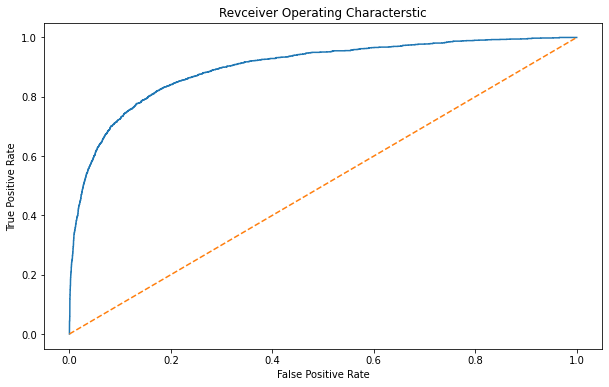

In [24]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train_res, y_train_res)

print_score(knn_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(knn_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.38%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.963822      0.760682  0.833773      0.862252      0.862252
recall         0.693581      0.973966  0.833773      0.833773      0.833773
f1-score       0.806670      0.854212  0.833773      0.830441      0.830441
support    29538.000000  29538.000000  0.833773  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[20487  9051]
 [  769 28769]]

Test Result:
Accuracy Score: 69.64%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.975727     0.262924  0.696373      0.619326      0.891757
recall         0.672559     0.874704  0.696373      0.773632      0.696373
f1-score       0.796263     0.404316  0.696373      0.600289      0.750090
suppo

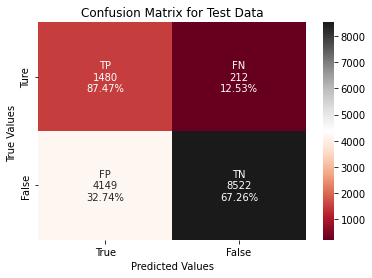

In [26]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8868343939074222

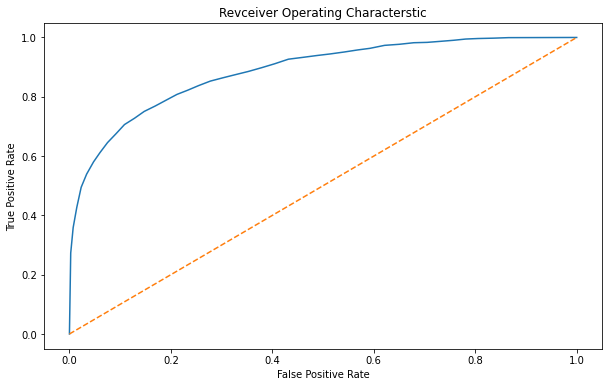

In [28]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

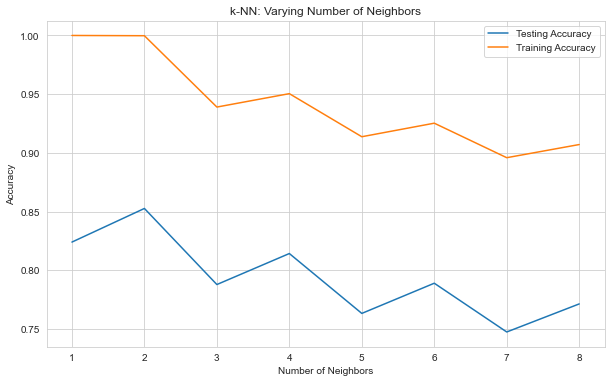

In [29]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train_res, y_train_res)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train_res, y_train_res)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

GRADIENT BOOSTING CLASSIFER

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train_res, y_train_res)

print_score(gb_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(gb_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.95%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.850398      0.829186  0.839461      0.839792      0.839792
recall         0.823854      0.855068  0.839461      0.839461      0.839461
f1-score       0.836916      0.841928  0.839461      0.839422      0.839422
support    29538.000000  29538.000000  0.839461  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[24335  5203]
 [ 4281 25257]]

Test Result:
Accuracy Score: 79.82%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.960075     0.338766  0.798162      0.649421      0.886883
recall         0.804672     0.749409  0.798162      0.777041      0.798162
f1-score       0.875531     0.466605  0.798162      0.671068      0.827359
suppo

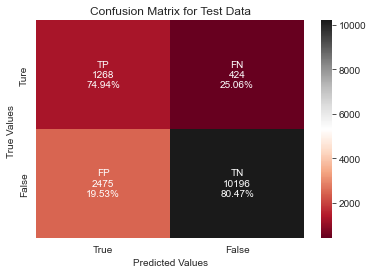

In [31]:
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8535005195124549

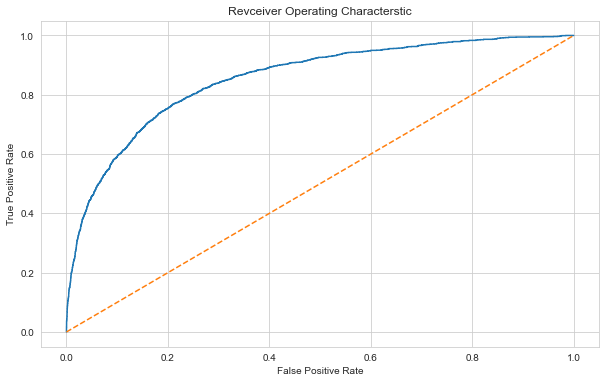

In [33]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##  Decision Tree Classifier 

In [34]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=100,)
tree_clf.fit(X_train_res, y_train_res)

print_score(tree_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(tree_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.93%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.824731      0.813984  0.819267      0.819357      0.819357
recall         0.810854      0.827680  0.819267      0.819267      0.819267
f1-score       0.817733      0.820775  0.819267      0.819254      0.819254
support    29538.000000  29538.000000  0.819267  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[23951  5587]
 [ 5090 24448]]

Test Result:
Accuracy Score: 75.80%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.944589     0.278220  0.757989      0.611405      0.866089
recall         0.770894     0.661348  0.757989      0.716121      0.757989
f1-score       0.848948     0.391670  0.757989      0.620309      0.795080
suppo

## CONFUSION MATRIX FOR TEST 

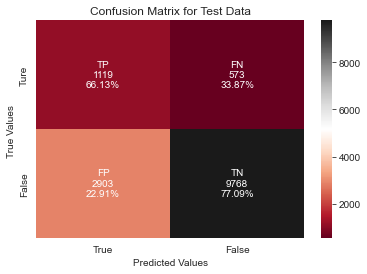

In [35]:
y_pred = tree_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## ROC FOR TEST

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7998467722781661

## ROC CURVE

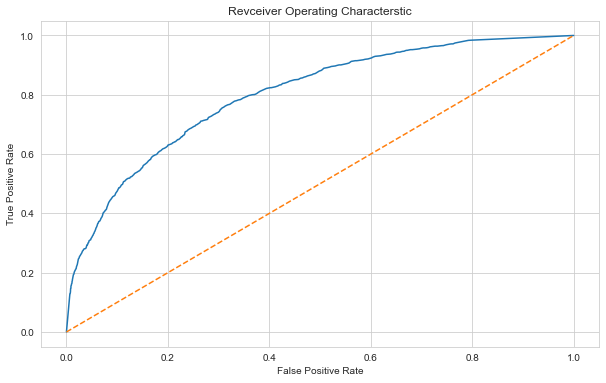

In [37]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##  Random Forest CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=100,)
rf_clf.fit(X_train_res, y_train_res)

print_score(rf_clf,X_train_res, y_train_res, X_test, y_test, train=True)
print_score(rf_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.61%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.871393      0.901974  0.886079      0.886684      0.886684
recall         0.905850      0.866308  0.886079      0.886079      0.886079
f1-score       0.888288      0.883781  0.886079      0.886034      0.886034
support    29538.000000  29538.000000  0.886079  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[26757  2781]
 [ 3949 25589]]

Test Result:
Accuracy Score: 85.38%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.953030     0.424332  0.853791      0.688681      0.890748
recall         0.877516     0.676123  0.853791      0.776819      0.853791
f1-score       0.913715     0.521422  0.853791      0.717569      0.867502
suppo

## CONFUSION MATRIX FOR TEST

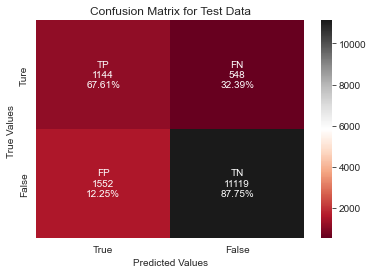

In [39]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## ROC FOR TEST

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8737601059585252

## ROC CURVE

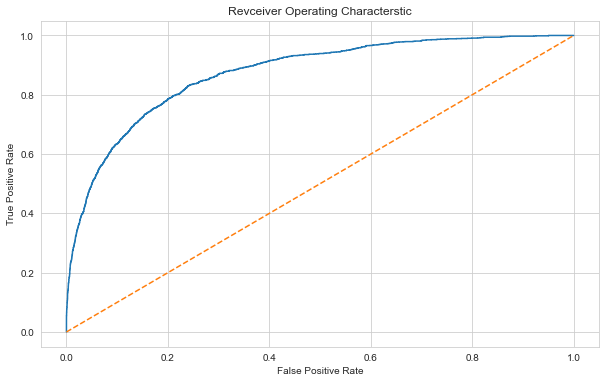

In [41]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##  Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(n_jobs=20,)
lr_clf.fit(X_train_res, y_train_res)

print_score(lr_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(lr_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.82%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.779164      0.757996  0.768163      0.768580      0.768580
recall         0.748460      0.787866  0.768163      0.768163      0.768163
f1-score       0.763503      0.772643  0.768163      0.768073      0.768073
support    29538.000000  29538.000000  0.768163  59076.000000  59076.000000
_______________________________________________
Confusion Matrix: 
 [[22108  7430]
 [ 6266 23272]]

Test Result:
Accuracy Score: 73.61%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.952974     0.269956  0.736128      0.611465      0.872512
recall         0.737274     0.727541  0.736128      0.732408      0.736128
f1-score       0.831361     0.393794  0.736128      0.612577      0.779814
suppo

## CONFUSION MATRIX FOR TEST

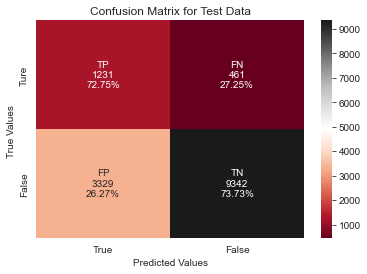

In [43]:
y_pred = lr_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## ROC VALUE FOR TEST

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8044419947412541

## ROC CURVE

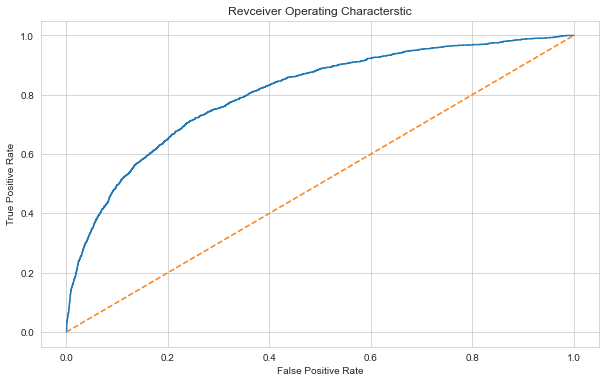

In [45]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [46]:
from sklearn.metrics import auc

auc_lr=auc(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
auc_knn=auc(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
auc_svm=auc(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
auc_lgbmc=auc(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
auc_tree=auc(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
auc_rf=auc(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
auc_xgb=auc(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
auc_gb=auc(false_positive_rate_gb_clf,true_positive_rate_gb_clf)

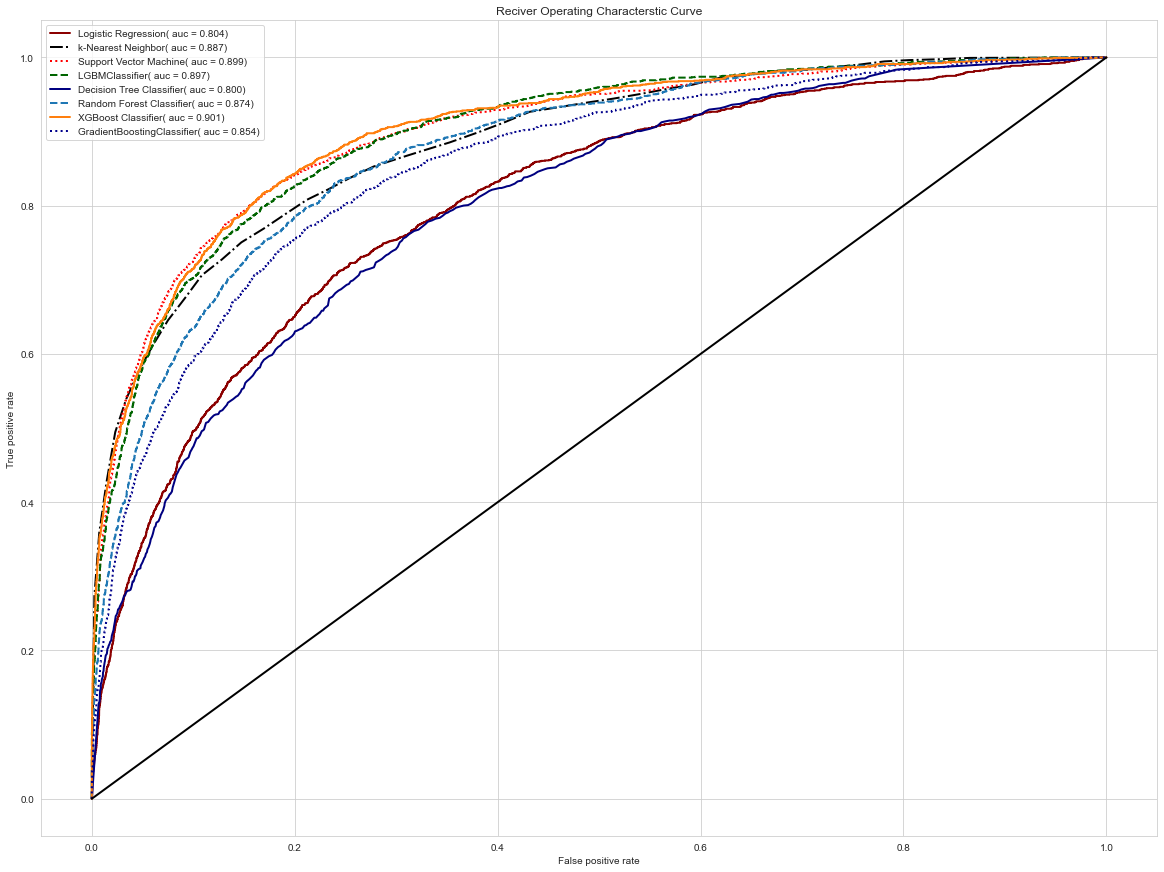

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,linewidth=2,color="darkred",linestyle='-',label='Logistic Regression( auc = %0.3f)' % auc_lr)
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,linewidth=2,color="black",linestyle='-.',label='k-Nearest Neighbor( auc = %0.3f)' % auc_knn)
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,linewidth=2,color="red",linestyle=':',label='Support Vector Machine( auc = %0.3f)' % auc_svm)
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,linewidth=2,color="darkgreen",linestyle='dashed',label='LGBMClassifier( auc = %0.3f)' % auc_lgbmc)
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,linewidth=2,color="navy",linestyle='solid',label='Decision Tree Classifier( auc = %0.3f)' % auc_tree)
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,linewidth=2,linestyle='--',label='Random Forest Classifier( auc = %0.3f)' % auc_rf)
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,linewidth=2,linestyle='-',label='XGBoost Classifier( auc = %0.3f)' % auc_xgb)
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf,linewidth=2,color="darkblue",linestyle='dotted',label='GradientBoostingClassifier( auc = %0.3f)' % auc_gb)

plt.plot([0,1],linewidth=2,color="black",linestyle='-')
#plt.plot([0,0],[1,0],c='.1')
#plt.plot([1,1],c='.1')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import auc

auc_lr=auc(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
auc_knn=auc(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
auc_svm=auc(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
auc_lgbmc=auc(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
auc_tree=auc(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
auc_rf=auc(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
auc_xgb=auc(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
auc_gb=auc(false_positive_rate_gb_clf,true_positive_rate_gb_clf)

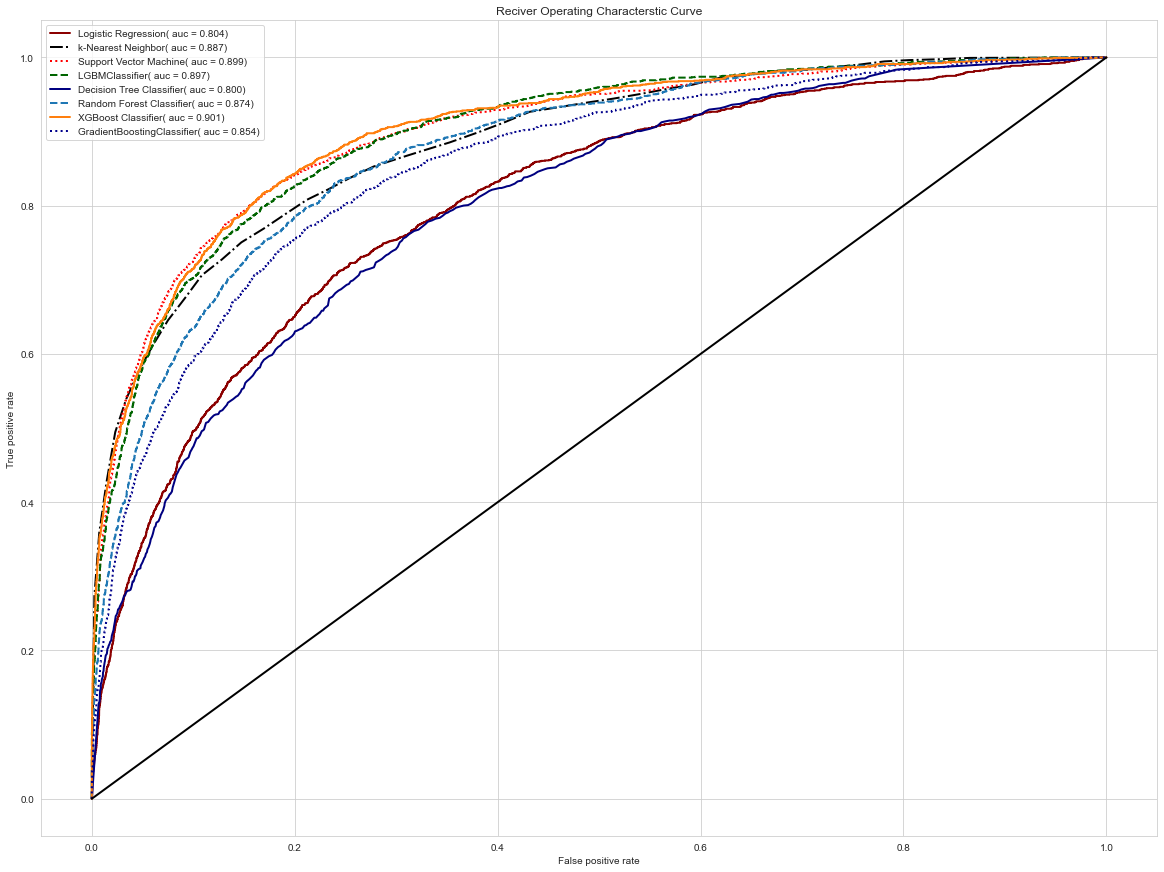

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,linewidth=2,color="darkred",linestyle='-',label='Logistic Regression( auc = %0.3f)' % auc_lr)
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,linewidth=2,color="black",linestyle='-.',label='k-Nearest Neighbor( auc = %0.3f)' % auc_knn)
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,linewidth=2,color="red",linestyle=':',label='Support Vector Machine( auc = %0.3f)' % auc_svm)
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,linewidth=2,color="darkgreen",linestyle='dashed',label='LGBMClassifier( auc = %0.3f)' % auc_lgbmc)
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,linewidth=2,color="navy",linestyle='solid',label='Decision Tree Classifier( auc = %0.3f)' % auc_tree)
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,linewidth=2,linestyle='--',label='Random Forest Classifier( auc = %0.3f)' % auc_rf)
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,linewidth=2,linestyle='-',label='XGBoost Classifier( auc = %0.3f)' % auc_xgb)
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf,linewidth=2,color="darkblue",linestyle='dotted',label='GradientBoostingClassifier( auc = %0.3f)' % auc_gb)

plt.plot([0,1],linewidth=2,color="black",linestyle='-')
#plt.plot([0,0],[1,0],c='.1')
#plt.plot([1,1],c='.1')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()